\
\

# import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, Dense
import matplotlib.pyplot as plt

# Loading the CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# Class names for CIFAR-10
class_names = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

# Displaying some images from the training dataset
plt.figure(figsize=(10, 10))

for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.xticks([])  # Remove x-axis ticks
    plt.yticks([])  # Remove y-axis ticks
    plt.grid(False)  # Disable the grid
    plt.imshow(train_images[i])  # Show the image
    plt.xlabel(class_names[train_labels[i][0]])  # Show the label as the class name

plt.show()

# Normalizing the images to a range of 0 to 1
train_images = train_images / 255.0
test_images = test_images / 255.0

# Defining a simple CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')  # 10 classes for CIFAR-10
])

# Compiling the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Training the model
model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc}")


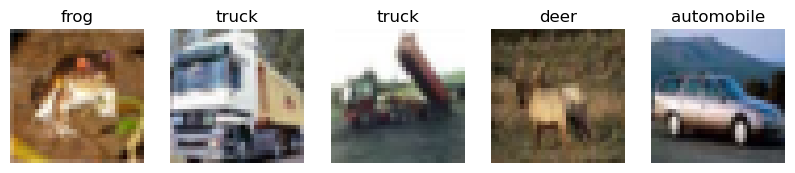

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.3318 - loss: 1.7865 - val_accuracy: 0.5134 - val_loss: 1.3426
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.5335 - loss: 1.2987 - val_accuracy: 0.5647 - val_loss: 1.2519
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.5909 - loss: 1.1436 - val_accuracy: 0.6169 - val_loss: 1.0907
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.6424 - loss: 1.0185 - val_accuracy: 0.6468 - val_loss: 1.0141
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.6749 - loss: 0.9292 - val_accuracy: 0.6545 - val_loss: 0.9830
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.6976 - loss: 0.8634 - val_accuracy: 0.6742 - val_loss: 0.9204
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.7176 - loss: 0.8066 - val_accuracy: 0.6780 - val_loss: 0.9187
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.7324 - loss: 0.7723 - val_accu

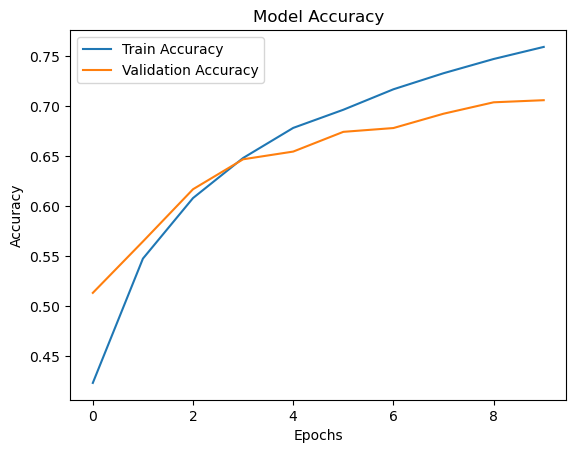

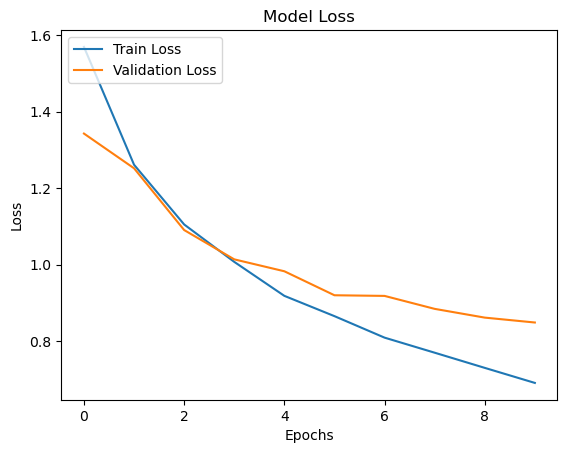

In [11]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Step 1: Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Step 2: Normalize the data to [0, 1]
x_train, x_test = x_train / 255.0, x_test / 255.0

# Step 3: One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Step 4: Visualize a few training images
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Plot first 5 images in the training set
plt.figure(figsize=(10, 10))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(x_train[i])
    plt.title(class_names[y_train[i].argmax()])
    plt.axis('off')
plt.show()

# Step 5: Create the CNN model
model = tf.keras.models.Sequential()

# Convolutional Layer 1
model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))

# Convolutional Layer 2
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))

# Convolutional Layer 3
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))

# Flatten the 3D outputs to 1D for dense layers
model.add(tf.keras.layers.Flatten())

# Dense Layer 1
model.add(tf.keras.layers.Dense(64, activation='relu'))

# Output Layer (10 units for 10 classes)
model.add(tf.keras.layers.Dense(10, activation='softmax'))

# Step 6: Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Step 7: Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))

# Step 8: Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc}")

# Step 9: Visualize training and validation performance
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper left')
plt.show()

# Step 10: Save the model (Optional)
model.save('cnn_cifar10_model.h5')